In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import colors as colors_lib
import random
import pickle
import numpy as np
from typing import List
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVM

In [ ]:
mnist = fetch_openml('mnist_784')

In [5]:
x,y = mnist.data, mnist.target
x,y = shuffle(x,y)

In [6]:
def show_some_images(images, n = 3, dims = 1):
  
  for index, image in enumerate(images[:n]):
    if dims == 1:
        plt.imshow(image.reshape(28,28),cmap='gray')
    else:
        plt.imshow(image.reshape(28,28,3))
    plt.show()

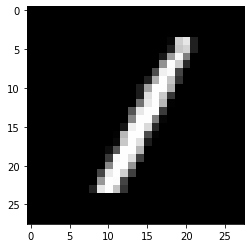

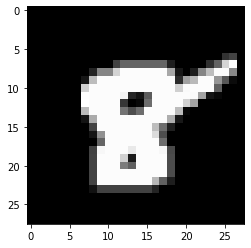

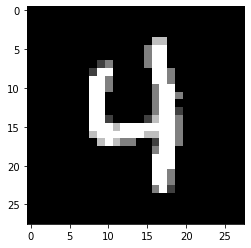

In [7]:
show_some_images(x)

In [9]:
np.save("mnist_x.npy", x)
np.save("mnist_y.npy", y)
x_3d = np.stack([x,x,x])
x_3d = np.swapaxes(x_3d, 0, 2)
x_3d = np.swapaxes(x_3d, 0, 1)
x_3d /= 255.

In [10]:
x_3d.shape

(70000, 784, 3)

In [13]:
def colorize(x, colors: List[str], threshold: float):
    
    x_copy = x.copy().reshape(x.shape[0], 28, 28, x.shape[-1])
    x_colored = x_copy.copy()

    color_strings = []
    
    for i,img in enumerate(x_colored):
        color_str = random.choice(colors)
        color = np.array(colors_lib.to_rgb(color_str))
        color_strings.append((color_str, color))

        color_mask = np.zeros_like(x_colored[0])
        color_mask[:, :] = color
        idx = (img > threshold)[:,:,0]
        x_colored[i][idx] = color*(1 - 0.6*x_colored[i][idx])
    return x_colored, color_strings

In [14]:
colors = ["blue", "red", "green", "yellow", "cyan", "orange", "purple", "lime"]
x_colored, color_strings = colorize(x_3d[:], colors = colors, threshold = 0.1)

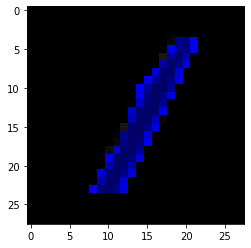

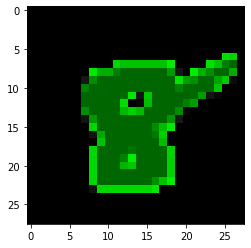

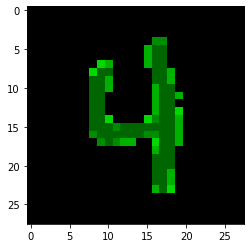

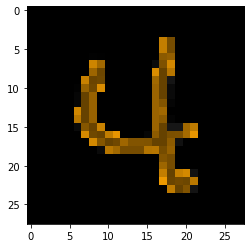

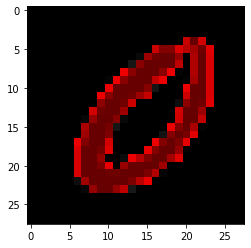

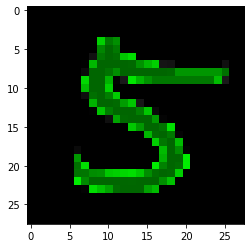

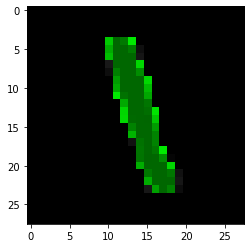

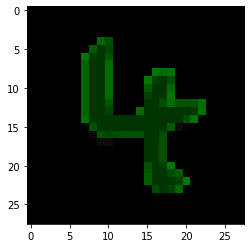

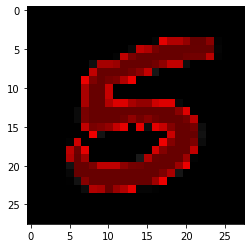

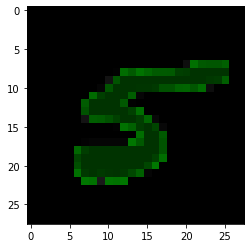

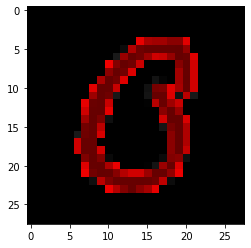

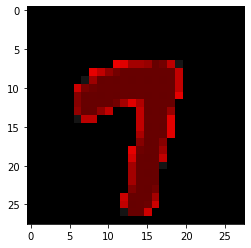

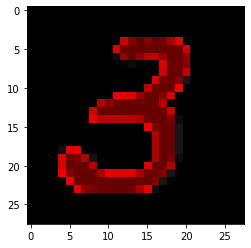

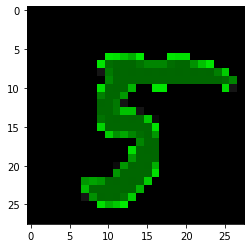

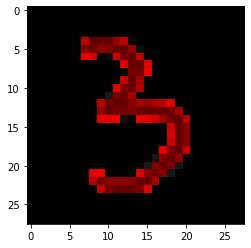

In [15]:
show_some_images(x_colored,dims=10, n = 15)

In [16]:
colored_mnist = {"colors": color_strings, "x": x_colored, "y": y}
with open("mnist.colored.dict.pickle", "wb") as f:
    pickle.dump(colored_mnist, f)

In [18]:
model = SGDClassifier(max_iter = 1500)
x_colored_flat = x_colored.reshape(x_colored.shape[0], 28*28*3)
model.fit(x_colored_flat[:60000], y[:60000])
print(model.score(x_colored_flat[60000:], y[60000:]))

/home/shauli/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


KeyboardInterrupt: 